# Stroke units

In this notebook we make basic maps of the stroke unit locations.

## Plain English summary

We can make maps to show how different parts of England and Wales or of Northern Ireland have different access to emergency stroke services. We're generally interested in seeing the distance between each area and its nearest acute stroke unit. Also, because only a few stroke units provide thrombectomy, we also want to see how close each area is to its nearest stroke unit that provides thrombectomy.

This notebook shows how to use the `stroke-maps` package to create basic maps of the different types of stroke unit.

## Aims

This notebook shows how to import the stroke unit data and make a map of the stroke units. The units are displayed differently depending on whether or not they provide MT.

## Method

Separately for the England and Wales and for the Northern Ireland data:

+ Load the stroke unit services information
+ Load the stroke unit geometry
+ Link the services to the geometry
+ Display the stroke units on a map. Display the units providing MT differently to those that do not.

## Notebook setup

In [1]:
import stroke_maps.load_data
import stroke_maps.catchment

import pandas as pd
import matplotlib.pyplot as plt

## England and Wales units

### Load the stroke unit data

In [2]:
df_units = stroke_maps.load_data.stroke_unit_region_lookup()

In [3]:
df_units.head(3).T

postcode,SY231ER,CB20QQ,L97AL
stroke_team,Bronglais Hospital (Aberystwyth),"Addenbrooke's Hospital, Cambridge","University Hospital Aintree, Liverpool"
short_code,AB,AD,AI
ssnap_name,Bronglais Hospital,Addenbrooke's Hospital,University Hospital Aintree
use_ivt,1,1,1
use_mt,0,1,1
use_msu,0,1,1
transfer_unit_postcode,nearest,nearest,nearest
lsoa,Ceredigion 002A,Cambridge 013D,Liverpool 005A
lsoa_code,W01000512,E01017995,E01006654
region,Hywel Dda University Health Board,NHS Cambridgeshire and Peterborough ICB - 06H,NHS Cheshire and Merseyside ICB - 99A


### Plot the unit locations

First load the outline of England and Wales:

In [4]:
gdf_ew = stroke_maps.load_data.englandwales_outline()

Then load in the stroke unit coordinates:

In [5]:
gdf_units = stroke_maps.load_data.stroke_unit_coordinates()

Merge in the unit services information:

In [6]:
gdf_units = pd.merge(
    gdf_units, df_units[['use_ivt', 'use_mt']],
    left_index=True, right_index=True, how='right'
)

Plot the country outlines and the unit locations using matplotlib:

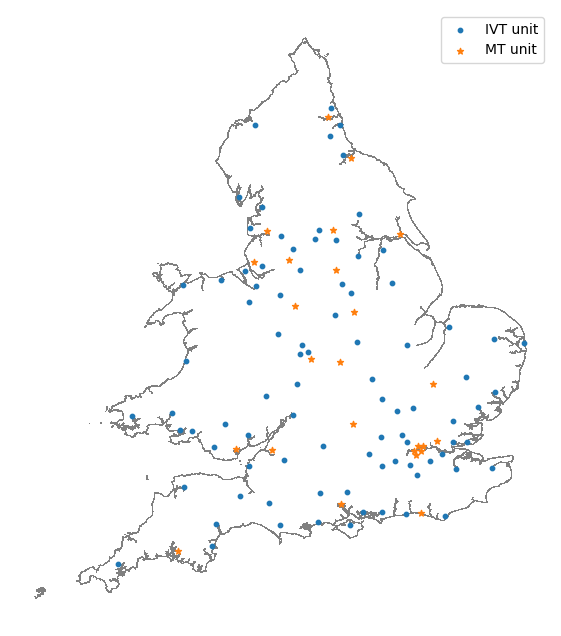

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the country outlines:
gdf_ew.plot(
    ax=ax,              # Set which axes to use for plot
    antialiased=False,  # Avoids artefact boundary lines
    facecolor='none',
    edgecolor='grey',
    linewidth=0.2,
    )

# Pick out which stroke units to plot:
mask_ivt = ((gdf_units['use_ivt'] == 1) & (gdf_units['use_mt'] == 0))
mask_mt = (gdf_units['use_mt'] == 1)

# IVT units:
ax.scatter(
    gdf_units.loc[mask_ivt, 'geometry'].x,
    gdf_units.loc[mask_ivt, 'geometry'].y,
    marker='o',
    label='IVT unit',
    s=10,  # size
    )

# MT units:
ax.scatter(
    gdf_units.loc[mask_mt, 'geometry'].x,
    gdf_units.loc[mask_mt, 'geometry'].y,
    marker='*',
    label='MT unit',
    s=20,  # size
    )

# Remove the axis border, ticks, labels...
ax.axis('off')

# Add legend:
ax.legend()

plt.show()

## Northern Ireland units

### Load the stroke unit data

In [8]:
df_units_ni = stroke_maps.load_data.ni_stroke_unit_services()

In [9]:
df_units_ni.head(3).T

Postcode,BT126BA,BT161RH,BT358DR
Hospital_name,Royal Victoria,Ulster,Daisy Hill
City,Belfast,Belfast,Newry
door_to_needle,43,50,38
Fixed,2.0,NaN,NaN
use_ivt,1,1,0
use_mt,1,0,0


### Plot the unit locations

First load the outline of Northern Ireland:

In [10]:
gdf_ni = stroke_maps.load_data.ni_outline()

Then load in the stroke unit coordinates:

In [11]:
gdf_units_ni = stroke_maps.load_data.stroke_unit_coordinates_ni()

Merge in the unit services information:

In [12]:
gdf_units_ni = pd.merge(
    gdf_units_ni, df_units_ni[['use_ivt', 'use_mt']],
    left_index=True, right_index=True, how='right'
)

Plot the country outlines and the unit locations using matplotlib:

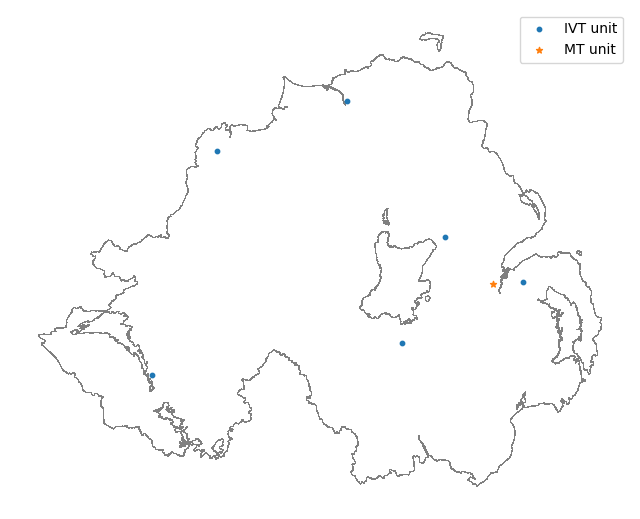

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the country outlines:
gdf_ni.plot(
    ax=ax,              # Set which axes to use for plot
    antialiased=False,  # Avoids artefact boundary lines
    facecolor='none',
    edgecolor='grey',
    linewidth=0.2,
    )

# Pick out which stroke units to plot:
mask_ivt = ((gdf_units_ni['use_ivt'] == 1) & (gdf_units_ni['use_mt'] == 0))
mask_mt = (gdf_units_ni['use_mt'] == 1)

# IVT units:
ax.scatter(
    gdf_units_ni.loc[mask_ivt, 'geometry'].x,
    gdf_units_ni.loc[mask_ivt, 'geometry'].y,
    marker='o',
    label='IVT unit',
    s=10,  # size
    )

# MT units:
ax.scatter(
    gdf_units_ni.loc[mask_mt, 'geometry'].x,
    gdf_units_ni.loc[mask_mt, 'geometry'].y,
    marker='*',
    label='MT unit',
    s=20,  # size
    )

# Remove the axis border, ticks, labels...
ax.axis('off')

# Add legend:
ax.legend()

plt.show()

## Conclusion

We have shown how to load in the data on stroke units and how to pick out the relevant bits to create a map of the stroke units by services provided.